# In Depth A/B Testing - Lab

## Introduction

In this lab, you'll explore a survey from Kaggle regarding budding data scientists. With this, you'll form some initial hypotheses, and test them using the tools you've acquired to date. 

## Objectives

You will be able to:
* Conduct t-tests and an ANOVA on a real-world dataset and interpret the results

## Load the Dataset and Perform a Brief Exploration

The data is stored in a file called **multipleChoiceResponses_cleaned.csv**. Feel free to check out the original dataset referenced at the bottom of this lab, although this cleaned version will undoubtedly be easier to work with. Additionally, meta-data regarding the questions is stored in a file name **schema.csv**. Load in the data itself as a Pandas DataFrame, and take a moment to briefly get acquainted with it.

> Note: If you can't get the file to load properly, try changing the encoding format as in `encoding='latin1'`

In [24]:
#Your code here
import pandas as pd
import seaborn as sns
import numpy as np

df = pd.read_csv("multipleChoiceResponses_cleaned.csv", encoding = 'latin1')
schema_df = pd.read_csv("schema.csv")
df.head()

/home/mungai/anaconda3/envs/learn-env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity,exchangeRate,AdjustedCompensation
0,"Non-binary, genderqueer, or gender non-conforming",NaN,NaN,Employed full-time,NaN,NaN,Yes,NaN,DBA/Database Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,United States,30.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Somewhat important,NaN,NaN,NaN,NaN
2,Male,Canada,28.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,NaN,NaN
3,Male,United States,56.0,"Independent contractor, freelancer, or self-em...",NaN,NaN,Yes,NaN,Operations Research Practitioner,Poorly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,250000.0
4,Male,Taiwan,38.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Wages and Education

You've been asked to determine whether education is impactful to salary. Develop a hypothesis test to compare the salaries of those with Master's degrees to those with Bachelor's degrees. Are the two statistically different according to your results?

> Note: The relevant features are stored in the 'FormalEducation' and 'AdjustedCompensation' features.

You may import the functions stored in the `flatiron_stats.py` file to help perform your hypothesis tests. It contains the stats functions that you previously coded: `welch_t(a,b)`, `welch_df(a, b)`, and `p_value(a, b, two_sided=False)`. 

Note that `scipy.stats.ttest_ind(a, b, equal_var=False)` performs a two-sided Welch's t-test and that p-values derived from two-sided tests are two times the p-values derived from one-sided tests. See the [documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html) for more information.    

In [35]:
#Your code here
import flatiron_stats as fs
educ = 'FormalEducation'
comp = 'AdjustedCompensation'
masters = "Master's degree"
degree = "Bachelor's degree"
subset = df[(~df[educ].isnull()) & (~df[comp].isnull())]
p1 = subset[subset[educ]==masters][comp]
p2 = subset[subset[educ]==masters][comp]

/home/mungai/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/mungai/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AdjustedCompensation', ylabel='Density'>

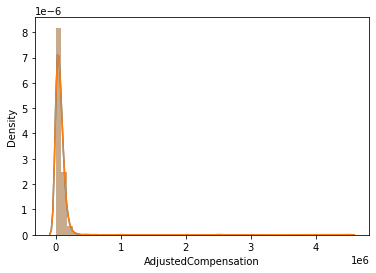

In [36]:
sns.distplot(p1)
sns.distplot(p2)


In [37]:
print('Comparison of {} for {} and {}'.format(comp, masters, degree))
print("Median Values: \tp1: {} \tp2: {}".format(round(p1.median(),2), round(p2.median(),2)))
print("Mean Values: \tp1: {} \tp2: {}".format(round(p1.mean(),2), round(p2.mean(),2)))
print('Sample sizes: \tp1: {} \tp2: {}'.format(len(p1), len(p2)))
print("Welch's t-test p-value:", fs.p_value_welch_ttest(p1, p2))

Comparison of AdjustedCompensation for Master's degree and Bachelor's degree
Median Values: 	p1: 53812.17 	p2: 53812.17
Mean Values: 	p1: 69139.9 	p2: 69139.9
Sample sizes: 	p1: 1990 	p2: 1990
Welch's t-test p-value: 0.5


In [38]:
#Investigate Percentiles
for q in np.linspace(.8, 1, num=21):
    p1q =  round(p1.quantile(q=q), 2)
    p2q =  round(p2.quantile(q=q), 2)
    print('{}th percentile:\tset1: {}\tset2: {}'.format(round(q,2), p1q, p2q))

0.8th percentile:	set1: 103000.0	set2: 103000.0
0.81th percentile:	set1: 107009.0	set2: 107009.0
0.82th percentile:	set1: 110000.0	set2: 110000.0
0.83th percentile:	set1: 111503.83	set2: 111503.83
0.84th percentile:	set1: 115240.4	set2: 115240.4
0.85th percentile:	set1: 119582.6	set2: 119582.6
0.86th percentile:	set1: 120000.0	set2: 120000.0
0.87th percentile:	set1: 124719.88	set2: 124719.88
0.88th percentile:	set1: 129421.46	set2: 129421.46
0.89th percentile:	set1: 130000.0	set2: 130000.0
0.9th percentile:	set1: 135000.0	set2: 135000.0
0.91th percentile:	set1: 140000.0	set2: 140000.0
0.92th percentile:	set1: 149640.0	set2: 149640.0
0.93th percentile:	set1: 150000.0	set2: 150000.0
0.94th percentile:	set1: 160000.0	set2: 160000.0
0.95th percentile:	set1: 166778.6	set2: 166778.6
0.96th percentile:	set1: 180000.0	set2: 180000.0
0.97th percentile:	set1: 200000.0	set2: 200000.0
0.98th percentile:	set1: 211100.0	set2: 211100.0
0.99th percentile:	set1: 250000.0	set2: 250000.0
1.0th percentile

In [39]:
print('Repeated Test with Outliers Removed:')
print('p1: {}\tp2: {}'.format(masters, degree))
outlier_threshold = 500000
p1 = subset[(subset[educ]==masters) & (subset[comp]<=outlier_threshold)][comp]
p2 = subset[(subset[educ]==degree) & (subset[comp]<=outlier_threshold)][comp]
print("Median Values: \tp1: {} \tp2: {}".format(round(p1.median(),2), round(p2.median(),2)))
print("Mean Values: \tp1: {} \tp2: {}".format(round(p1.mean(),2), round(p2.mean(),2)))
print('Sample sizes: \tp1: {} \tp2: {}'.format(len(p1), len(p2)))
print("Welch's t-test p-value with outliers removed:", fs.p_value_welch_ttest(p1, p2))

Repeated Test with Outliers Removed:
p1: Master's degree	p2: Bachelor's degree
Median Values: 	p1: 53539.72 	p2: 38292.15
Mean Values: 	p1: 63976.63 	p2: 53744.35
Sample sizes: 	p1: 1985 	p2: 1103
Welch's t-test p-value with outliers removed: 4.4874583271514723e-07


/home/mungai/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/mungai/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AdjustedCompensation', ylabel='Density'>

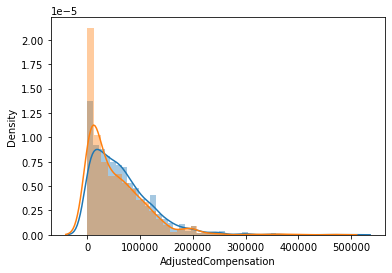

In [40]:
sns.distplot(p1)
sns.distplot(p2)

## Wages and Education II

Now perform a similar statistical test comparing the AdjustedCompensation of those with Bachelor's degrees and those with Doctorates. If you haven't already, be sure to explore the distribution of the AdjustedCompensation feature for any anomalies. 

In [41]:
#Your code here
educ = 'FormalEducation'
comp = 'AdjustedCompensation'
subset = df[(~df[educ].isnull()) & (~df[comp].isnull())]
p1 = subset[subset[educ]=="Doctoral degree"][comp]
p2 = subset[subset[educ]=="Bachelor's degree"][comp]
print("Median Values: \np1:{} \np2:{}".format(round(p1.median(),2), round(p2.median(),2)))
print('Sample sizes: \np1: {} \np2: {}'.format(len(p1), len(p2)))
print("Welch's t-test p-value:", fs.p_value_welch_ttest(p1, p2))

print('\n\nRepeated Test with Ouliers Removed:')
outlier_threshold = 500000
p1 = subset[(subset[educ]=="Doctoral degree") & (subset[comp]<=outlier_threshold)][comp]
p2 = subset[(subset[educ]=="Bachelor's degree") & (subset[comp]<=outlier_threshold)][comp]
print('Sample sizes: \np1: {} \np2: {}'.format(len(p1), len(p2)))
print("Welch's t-test p-value with outliers removed:", fs.p_value_welch_ttest(p1, p2))

Median Values: 
p1:74131.92 
p2:38399.4
Sample sizes: 
p1: 967 
p2: 1107
Welch's t-test p-value: 0.15682381994720251


Repeated Test with Ouliers Removed:
Sample sizes: 
p1: 964 
p2: 1103
Welch's t-test p-value with outliers removed: 0.0


## Wages and Education III

Remember the multiple comparisons problem; rather than continuing on like this, perform an ANOVA test between the various 'FormalEducation' categories and their relation to 'AdjustedCompensation'.

In [42]:
#Your code here#Perform ANOVA here
import statsmodels.api as sm
from statsmodels.formula.api import ols

formula = '{} ~ C({})'.format(comp, educ)
lm = ols(formula, df).fit()
table = sm.stats.anova_lm(lm, typ=2)
print(table)


                          sum_sq      df         F    PR(>F)
C(FormalEducation)  6.540294e+17     6.0  0.590714  0.738044
Residual            7.999414e+20  4335.0       NaN       NaN


In [43]:
temp = df[df[comp]<=5*10**5]
formula = '{} ~ C({})'.format(comp, educ)
lm = ols(formula, temp).fit()
table = sm.stats.anova_lm(lm, typ=2)
print(table)

                          sum_sq      df          F        PR(>F)
C(FormalEducation)  5.841881e+11     6.0  29.224224  1.727132e-34
Residual            1.439270e+13  4320.0        NaN           NaN


## Additional Resources

Here's the original source where the data was taken from:  
    [Kaggle Machine Learning & Data Science Survey 2017](https://www.kaggle.com/kaggle/kaggle-survey-2017)

## Summary

In this lab, you practiced conducting actual hypothesis tests on actual data. From this, you saw how dependent results can be on the initial problem formulation, including preprocessing!